Import the necessary packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [2]:
plane_tickets = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1') 
plane_tickets.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [3]:
df_selected_columns = plane_tickets.loc[plane_tickets['booking_complete'] == 1, ['num_passengers', 'purchase_lead', 'length_of_stay', 'booking_origin', 'flight_duration', 'booking_complete']]
df_selected_columns

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [4]:
# Group the average days between the booking & traveling date per country
average_days = plane_tickets.groupby('booking_origin')['purchase_lead'].mean()

# Sort data starting from the lowest to the highest
average_days.sort_values().head(10)

booking_origin
Tanzania     10.000000
Vanuatu      11.000000
Israel       12.000000
Kenya        12.666667
Belarus      15.000000
Estonia      18.000000
Lebanon      18.000000
Czechia      20.000000
Mongolia     21.125000
Guatemala    22.000000
Name: purchase_lead, dtype: float64

Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

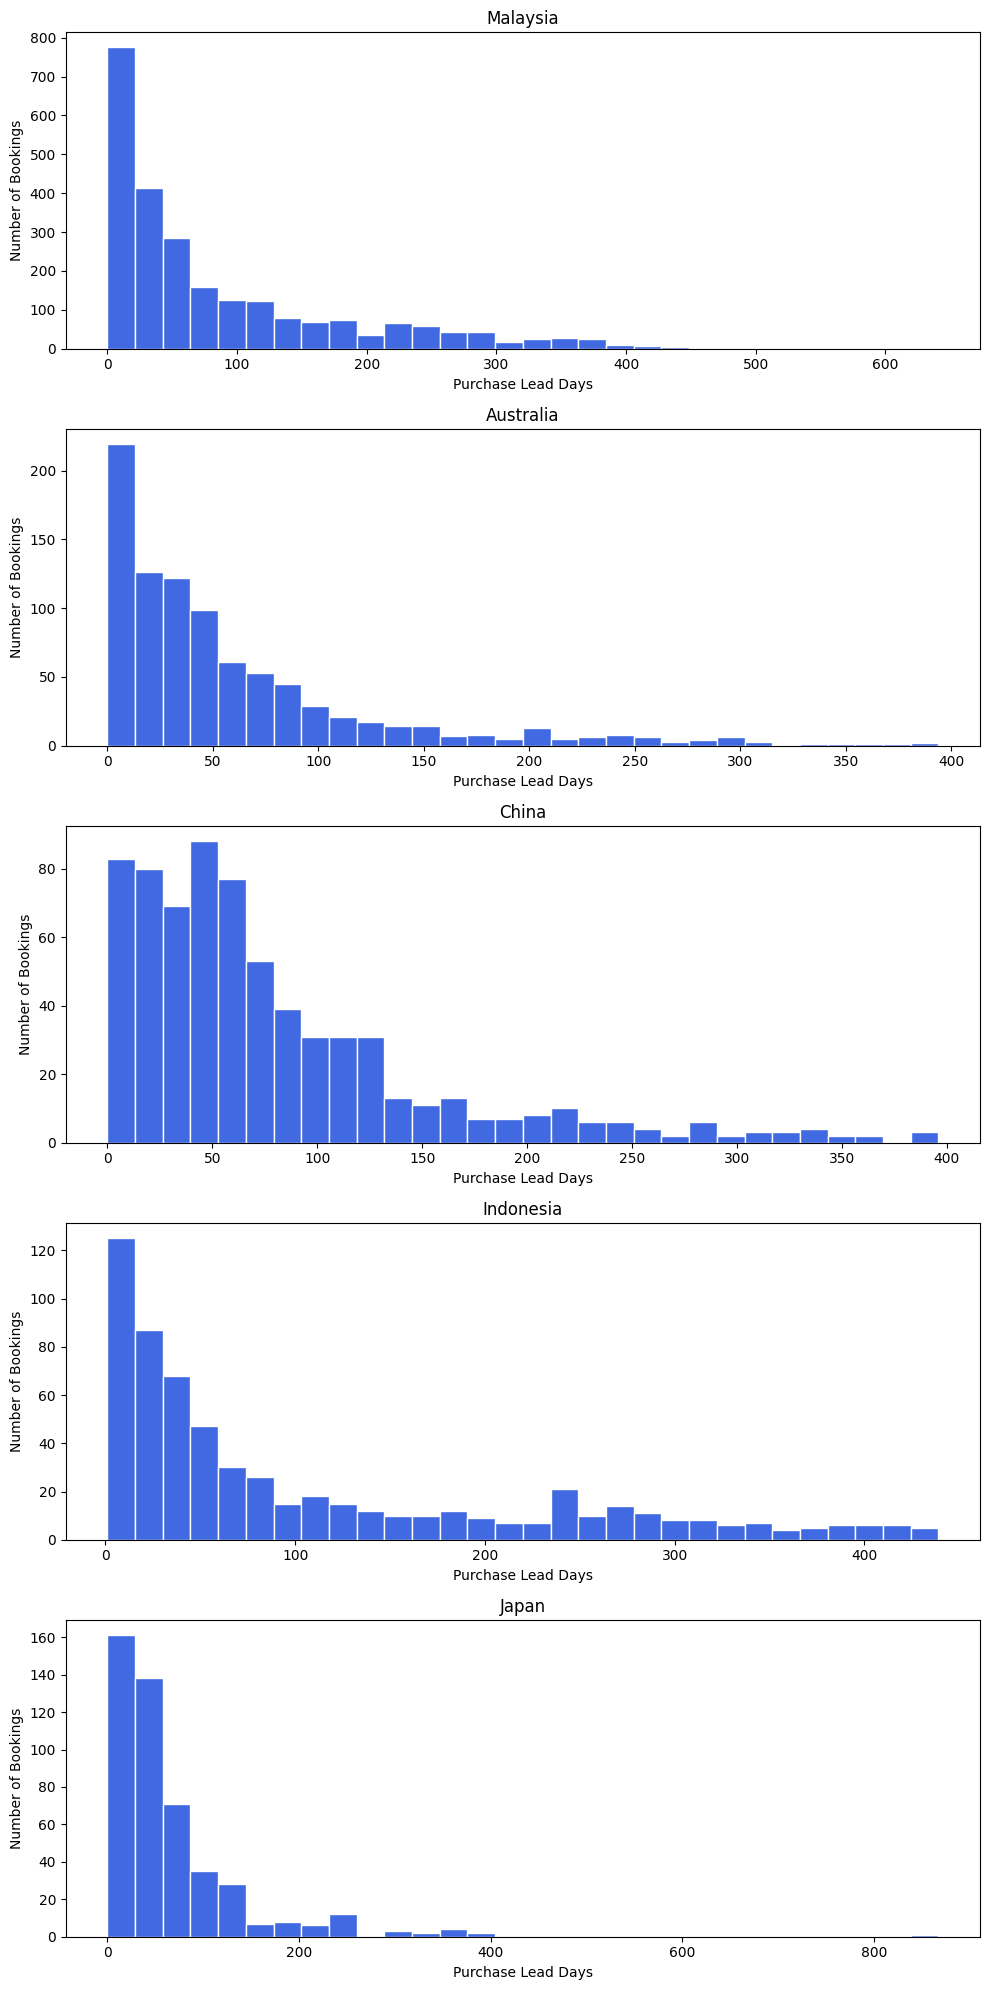

In [5]:
# Calculate the number of bookings per country
bookings_per_country = df_selected_columns.groupby('booking_origin').size()

# Sort the result to take the top 5 countries
top_countries = bookings_per_country.sort_values(ascending=False).head(5).index # type: ignore (suppress a warning)

# Create a figure with 5 subplots, one for each country
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
# axs in this case because I'm creating an array of axes

for i, country in enumerate(top_countries):
    # Filter the DataFrame for the current country
    df_country = df_selected_columns[df_selected_columns['booking_origin'] == country]
    
    # Plot the histogram of purchase lead days for the current country
    axs[i].hist(df_country['purchase_lead'], bins=30, color='royalblue', edgecolor = 'white')
    
    # Set the title for the current subplot
    axs[i].set_title(country)

    # Set labels for the current subplot
    axs[i].set_xlabel('Purchase Lead Days')
    axs[i].set_ylabel('Number of Bookings')

# Adjust the layout
plt.tight_layout()

plt.show()


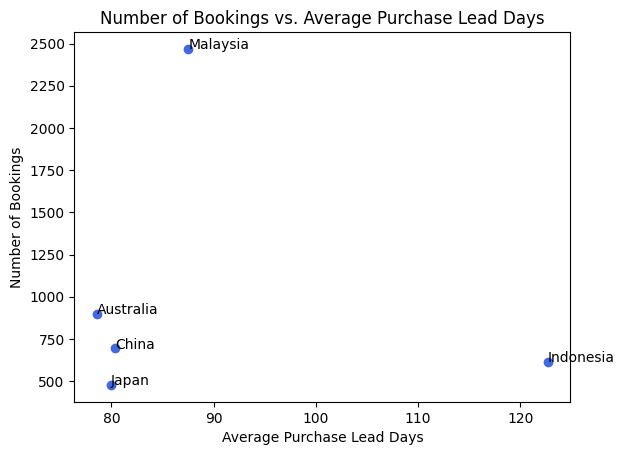

In [6]:
# Calculate the number of bookings per country
bookings_per_country = df_selected_columns.groupby('booking_origin').size()

# Sort the result to take the top 5 countries
top_countries = bookings_per_country.nlargest(5).index

# Prepare
X = average_days.loc[top_countries] # Average purchase lead per country (calculated previously) -- filter by top countries
Y = bookings_per_country.loc[top_countries]

# Plot the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(X, Y, color='royalblue')

# Add labels for each point
for i, country in enumerate(top_countries):
    ax.text(X.iloc[i], Y.iloc[i], country)

# Add labels and title
ax.set_xlabel('Average Purchase Lead Days')
ax.set_ylabel('Number of Bookings')
ax.set_title('Number of Bookings vs. Average Purchase Lead Days')

plt.show()